# Create tables for kaz texts according to russian big tables
# Structure of the table:
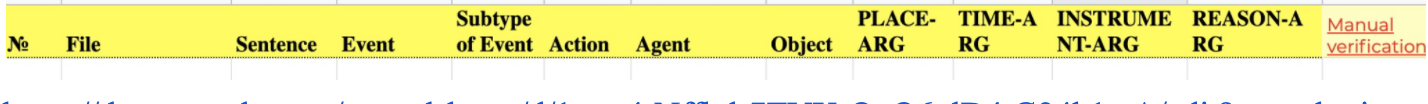

In [1]:
!pip install pandas
import pandas as pd

import os
import xml.dom.minidom
import io
import re
import csv

In [ ]:
# selecting sentences from verbs sheet
def sents_from_verbs(verbs_df):
  global selected_rows
  for idx, elem_verb in verbs_df.iterrows():
    if pd.notna(elem_verb['Object']):
      if pd.notna(elem_verb['Agent']):
        if pd.notna(elem_verb['PLACE-ARG']) or  pd.notna(elem_verb['TIME-ARG']) or pd.notna(elem_verb['INSTRUMENT-ARG']) or pd.notna(elem_verb['REASON-ARG']):
          new = dict(elem_verb)
          selected_rows = selected_rows.append(new, ignore_index=True)
  print(selected_rows)

In [ ]:
# selecting sentences from nouns sheet
def sents_from_nouns(nouns_df):
  global selected_rows
  for idx, elem_noun in nouns_df.iterrows():
    if pd.notna(elem_noun['Object']):
      if pd.notna(elem_noun['Agent']):
        if pd.notna(elem_noun['PLACE-ARG']) or  pd.notna(elem_noun['TIME-ARG']) or pd.notna(elem_noun['INSTRUMENT-ARG']) or pd.notna(elem_noun['REASON-ARG']):
          new = dict(elem_noun)
          selected_rows = selected_rows.append(new, ignore_index=True)
  print(selected_rows)

In [ ]:
# def action_search(words):
#   for idx_word, item_group_node_word in enumerate(words):
#         pos = item_group_node_word.getAttribute("pos")
#         if 'R_ET ' in pos:
#           if 'ET_KSE' not in pos:
#             if 'ET_ESM' not in pos:
#               if 'ET_ETU' not in pos:
#                 if 'ET_ETB' not in pos:
#                     print(pos)
#                     text_node = item_group_node_word.firstChild
#                     text_value = text_node.nodeValue
#                     return text_value

In [ ]:
def action_search(words, kz_elem, list_for_filling, list_for_filling_action):
  initial_len = len(kz_elem)
  action = ''
  for idx_word, item_group_node_word in enumerate(words):
    empty_elem = [value for value in kz_elem]
    if idx_word <= len(words)-2:
        next_pos = words[idx_word+1].getAttribute("pos")
        pos = item_group_node_word.getAttribute("pos")
        if 'R_ET ' in pos and 'R_ET ' in next_pos:
          if 'ET_KSE' not in next_pos and 'ET_ESM' not in next_pos and 'ET_ETU' not in next_pos and 'ET_ETB' not in next_pos:
                    text_node = item_group_node_word.firstChild
                    text_value1 = text_node.nodeValue
                    print('pos1 action: ', pos)
                    print('action word1: ', text_value1)
                    text_node2 = words[idx_word+1].firstChild
                    text_value2 = text_node2.nodeValue
                    print('pos2 action: ', next_pos)
                    print('action word2: ', text_value2)
                    action = text_value1+' '+text_value2
                    empty_elem.append(action)
                    result_elem  = relation_search(empty_elem)
                    print(result_elem)
                    if result_elem not in list_for_filling and result_elem not in list_for_filling_action:
                        list_for_filling.append(result_elem)
                        list_for_filling_action.append(result_elem)
  if action == '':
    for idx_word, item_group_node_word in enumerate(words):
        empty_elem = [value for value in kz_elem]
        pos = item_group_node_word.getAttribute("pos")
        if 'R_ET ' in pos:
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            print('pos action: ', pos)
            print('action word: ', text_value)
            action = text_value
            empty_elem.append(action)
            result_elem  = relation_search(empty_elem)
            print(result_elem)
            if result_elem not in list_for_filling and result_elem not in list_for_filling_action:
                list_for_filling.append(result_elem)
                list_for_filling_action.append(result_elem)
    if action == '':
      empty_elem = [value for value in kz_elem]
      empty_elem.append("")
      result_elem  = relation_search(empty_elem)
      print(result_elem)
      if result_elem not in list_for_filling:
        list_for_filling.append(result_elem)

In [ ]:
def agent_search(words):
  for idx_word, item_group_node_word in enumerate(words):
        pos = item_group_node_word.getAttribute("pos")
        if 'R_ZE ' in pos:
          if '_C' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value
        elif 'R_ZEQ 'in pos:
          if '_S' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value
        elif 'R_BOS 'in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value

In [ ]:
def object_search(words):
  for idx_word, item_group_node_word in enumerate(words):
        pos = item_group_node_word.getAttribute("pos")
        if 'R_ZE ' in pos:
          if '_C4' not in pos or'_C2' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value
        elif 'R_ZEQ 'in pos:
          if '_C4' not in pos or'_C2' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value
        elif 'R_BOS 'in pos:
          if '_C4' not in pos or'_C2' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value

In [ ]:
def PLACE_ARG_search(words):
  for idx_word, item_group_node_word in enumerate(words):
        pos = item_group_node_word.getAttribute("pos")
        if 'R_ZE ' in pos:
          if '_C6' not in pos or'_C5' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value
        elif 'R_ZEQ 'in pos:
          if '_S' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value

In [ ]:
def TIME_ARG_search(words):
  for idx_word, item_group_node_word in enumerate(words):
        pos = item_group_node_word.getAttribute("pos")
        if 'R_ZE ' in pos:
          if '_C6' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value
        elif 'R_ZEQ 'in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value

In [ ]:
def INSTRUMENT_ARG_search(words):
  for idx_word, item_group_node_word in enumerate(words):
        pos = item_group_node_word.getAttribute("pos")
        if 'R_ZE ' in pos:
          if '_C7' not in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value
        elif 'R_ZEQ 'in pos:
            # print(pos)
            text_node = item_group_node_word.firstChild
            text_value = text_node.nodeValue
            return text_value

In [ ]:
def relation_search(elem):
      #agent search
      agent = agent_search(words)
      if agent != None:
          elem.append(agent)
      else:
          elem.append("")
      #object search
      object_word = object_search(words)
      if object_word != None and object_word != agent:
          elem.append(object_word)
      else:
          elem.append("")
      #place_arg search
      place_arg = PLACE_ARG_search(words)
      if place_arg != None and place_arg != agent and place_arg != object_word:
          elem.append(place_arg)
      else:
          elem.append("")
      #time_arg search
      time_arg = TIME_ARG_search(words)
      if time_arg != None and time_arg != agent and time_arg != object_word and time_arg != place_arg:
          elem.append(time_arg)
      else:
          elem.append("")
      #instrument_arg searh
      instrument_arg = INSTRUMENT_ARG_search(words)
      if instrument_arg != None and instrument_arg != agent and instrument_arg != object_word and instrument_arg != place_arg and instrument_arg != time_arg:
          elem.append(instrument_arg)
      else:
          elem.append("")
      new_elem = elem
      return new_elem

# MOVEMENT



In [ ]:
#reading big table of each trigger
big_table = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/TRAFFIC_ACCIDENT/TRAFFIC_ACCIDENT_big_table.xlsx'
verbs_df = pd.read_excel(big_table, sheet_name="VERBS")
nouns_df = pd.read_excel(big_table, sheet_name="NOUNS")
print(verbs_df)
print(nouns_df)

     Unnamed: 0            File  ...  INSTRUMENT-ARG REASON-ARG
0             0  9177_ru_parsed  ...             NaN        NaN
1             1  4464_ru_parsed  ...             NaN        NaN
2             2  1356_ru_parsed  ...             NaN        NaN
3             3  2775_ru_parsed  ...             NaN        NaN
4             4  2474_ru_parsed  ...             NaN        NaN
..          ...             ...  ...             ...        ...
614         614  7594_ru_parsed  ...             NaN        NaN
615         615  9175_ru_parsed  ...             NaN        NaN
616         616  9190_ru_parsed  ...             NaN        NaN
617         617  2488_ru_parsed  ...             NaN        NaN
618         618  8046_ru_parsed  ...             NaN        NaN

[619 rows x 14 columns]
               File  Sentence  ... INSTRUMENT-ARG REASON-ARG
0    2477_ru_parsed         0  ...            NaN        NaN
1    2477_ru_parsed         1  ...            NaN        NaN
2    2477_ru_parsed     

In [ ]:
selected_rows = pd.DataFrame()
sents_from_verbs(verbs_df)
sents_from_nouns(nouns_df)
selected_rows.to_csv('/content/drive/MyDrive/Projects/ru_kz_texts_parsing/TRAFFIC_ACCIDENT/TRAFFIC_ACCIDENT_sents_for_kz_table.csv')

       Action        Agent     Event  ... TIME-ARG  Trigger of event Unnamed: 0
0   доставить    казинформ  transfer  ...  сегодня         доставить      166.0
1  остановить    сотрудник  transfer  ...      NaN        остановить      279.0
2  остановить    сотрудник  transfer  ...      NaN        остановить      281.0
3  остановить  полицейский  transfer  ...      NaN        остановить      283.0
4  остановить      мужчина  transfer  ...      NaN        остановить      294.0
5        уйти      девочка  transfer  ...      NaN              уйти      363.0
6    передать         врач  transfer  ...    вчера          передать      536.0
7      отдать     водитель  transfer  ...      NaN            отдать      555.0

[8 rows x 14 columns]
          Action          Agent  ... Trigger of event Unnamed: 0
0      доставить      казинформ  ...        доставить      166.0
1     остановить      сотрудник  ...       остановить      279.0
2     остановить      сотрудник  ...       остановить      281

In [ ]:
list_for_filling = []
list_for_filling_action = []
kz_dir_path  = "/content/drive/MyDrive/Projects/ru_kz_texts_parsing/Общий корпус_974 текста_parsing_07.08.21/kz"
for idx, elem in selected_rows.iterrows():
  new_file_name = re.sub('ru', 'kz', elem['File'])
  # print(new_file_name)
  # print(idx)
  sent_num = int(elem['Sentence'])
  kz_elem = [new_file_name, sent_num, elem['Event'], elem['Subtype of Event']]
  for elem in os.walk(kz_dir_path):
    for file in elem[2]:
        if file[:-4] == new_file_name:
          print(file[:-4])
          file_path = elem[0]+'/'+file
          parser=xml.dom.minidom.parse(file_path)
          sentences = parser.getElementsByTagName("sent")
          for index, item_group_node in enumerate(sentences):
              if sent_num == int(index):
                text_node = item_group_node.firstChild
                text_value = text_node.nodeValue
                print(text_value.strip())
                words = item_group_node.getElementsByTagName("word")
                action_search(words, kz_elem, list_for_filling, list_for_filling_action)        
             

1535_kz_parsed
А Н
['1535_kz_parsed', 2, 'transfer', 'TRAFFIC ACCIDENT', '', '', '', '', '', '']
2708_kz_parsed
Н Е
['2708_kz_parsed', 3, 'transfer', 'TRAFFIC ACCIDENT', '', '', '', '', '', '']
8801_kz_parsed
Маңғыстау облысында
['8801_kz_parsed', 4, 'transfer', 'TRAFFIC ACCIDENT', '', '', 'облысында', '', '', '']
2723_kz_parsed
Е Й
['2723_kz_parsed', 2, 'transfer', 'TRAFFIC ACCIDENT', '', '', '', '', '', '']
8191_kz_parsed
Алматы қаласында
['8191_kz_parsed', 4, 'transfer', 'TRAFFIC ACCIDENT', '', '', 'қаласында', '', '', '']
7995_kz_parsed
Түркістан облысында 1 5 жасар қыз ата -анасымен сөзге келіп , үйінен кетіп қалған
pos action:  кел_R_ET іп_ET_KSE
action word:  келіп
['7995_kz_parsed', 0, 'transfer', 'TRAFFIC ACCIDENT', 'келіп', '', 'облысында', '', '', '']
pos action:  қал_R_ET ған_T3
action word:  қалған
['7995_kz_parsed', 0, 'transfer', 'TRAFFIC ACCIDENT', 'қалған', '', 'облысында', '', '', '']
7756_kz_parsed
Тұражановтардың үйіне өз аяғымен барыпты .
pos action:  бар_R_ET ып_T

In [ ]:
!pip install xlsxwriter
!pip install XlsxWriter
import xlsxwriter

     |████████████████████████████████| 148 kB 31.2 MB/s 


In [ ]:
save_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/TRAFFIC_ACCIDENT/TRAFFIC_ACCIDENT_kz_big_table.xlsx'
writer = pd.ExcelWriter(save_path, engine='xlsxwriter')

for res in list_for_filling:
  print(res)
result_df = pd.DataFrame(list_for_filling, columns = ['File', "Sentence", "Event", "Subtype of Event", "Action", "Agent", "Object", "PLACE-ARG", "TIME-ARG", "INSTRUMENT-ARG"])
result_df.to_excel(writer, sheet_name='FULL', index=False)
result_df_action = pd.DataFrame(list_for_filling_action, columns = ['File', "Sentence", "Event", "Subtype of Event", "Action", "Agent", "Object", "PLACE-ARG", "TIME-ARG", "INSTRUMENT-ARG"])
result_df_action.to_excel(writer, sheet_name='ACTION', index=False)
writer.save()

['1535_kz_parsed', 2, 'transfer', 'TRAFFIC ACCIDENT', '', '', '', '', '', '']
['2708_kz_parsed', 3, 'transfer', 'TRAFFIC ACCIDENT', '', '', '', '', '', '']
['8801_kz_parsed', 4, 'transfer', 'TRAFFIC ACCIDENT', '', '', 'облысында', '', '', '']
['2723_kz_parsed', 2, 'transfer', 'TRAFFIC ACCIDENT', '', '', '', '', '', '']
['8191_kz_parsed', 4, 'transfer', 'TRAFFIC ACCIDENT', '', '', 'қаласында', '', '', '']
['7995_kz_parsed', 0, 'transfer', 'TRAFFIC ACCIDENT', 'келіп', '', 'облысында', '', '', '']
['7995_kz_parsed', 0, 'transfer', 'TRAFFIC ACCIDENT', 'қалған', '', 'облысында', '', '', '']
['7756_kz_parsed', 29, 'transfer', 'TRAFFIC ACCIDENT', 'барыпты', '', 'үйіне', '', '', '']
['2726_kz_parsed', 7, 'transfer', 'TRAFFIC ACCIDENT', 'шыққысы келді', '', '', '', '', '']
['6250_kz_parsed', 2, 'TRANSFER', 'TRAFFIC ACCIDENT', '', '', 'облысының', '', '', '']
['1356_kz_parsed', 3, 'TRANSFER', 'TRAFFIC ACCIDENT', 'деп хабарлайды', '', '', '', '', '']
['2754_kz_parsed', 3, 'TRANSFER', 'TRAFFIC ACC

# TRAFFIC_ACCIDENT


In [ ]:
TA_big_table = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/TRAFFIC_ACCIDENT/TRAFFIC_ACCIDENT_big_table.xlsx'
TA_nouns_df = pd.read_excel(TA_big_table, sheet_name="NOUNS")
print(TA_nouns_df.head())

             File  Sentence  ... INSTRUMENT-ARG REASON-ARG
0  2477_ru_parsed         0  ...            NaN        NaN
1  2477_ru_parsed         1  ...            NaN        NaN
2  2477_ru_parsed         2  ...            NaN        NaN
3  2477_ru_parsed         2  ...            NaN        NaN
4  2477_ru_parsed         4  ...            NaN        NaN

[5 rows x 13 columns]


In [ ]:
selected_rows = pd.DataFrame()
sents_from_nouns(TA_nouns_df)
selected_rows.to_csv('/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/TRAFFIC_ACCIDENT/TRAFFIC_ACCIDENT_sents_for_kz_table.csv')

          Action          Agent  ...           TIME-ARG Trigger of event
0      допустить       водитель  ...  14:45 20 сентября            наезд
1      совершить       водитель  ...         3 сентября     столкновение
2      совершить      казинформ  ...                NaN            наезд
3      совершить       водитель  ...           В 8 утра            наезд
4      совершить       водитель  ...  00:51 30 сентября            наезд
5      совершить       водитель  ...           9 ноября            наезд
6      совершить       водитель  ...          3:30 день            наезд
7      совершить        мужчина  ...                NaN            наезд
8      совершить     республика  ...                NaN            наезд
9   наказываться          штраф  ...                NaN            штраф
10     допустить       водитель  ...            28 июня            наезд
11     совершить     автомобиль  ...          26 август            наезд
12     допустить       водитель  ...  21:00 27 сент

# Adding a sheet to each big table in russian which contains action

In [57]:
path_to_table = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/police/police_big_table.xlsx'
big_table_verbs = pd.read_excel(path_to_table, sheet_name="VERBS")
big_table_nouns = pd.read_excel(path_to_table, sheet_name="NOUNS")
print(big_table_verbs)
print(big_table_nouns)
new_sheet = pd.DataFrame()

                File  Sentence  ... INSTRUMENT-ARG REASON-ARG
0     4916_ru_parsed         8  ...            NaN        NaN
1     3704_ru_parsed         3  ...            NaN        NaN
2     8532_ru_parsed         0  ...            NaN        NaN
3     1950_ru_parsed         5  ...            NaN        NaN
4     2664_ru_parsed         1  ...            NaN        NaN
...              ...       ...  ...            ...        ...
2033  3981_ru_parsed         5  ...            NaN        NaN
2034  7599_ru_parsed        10  ...            NaN        NaN
2035  9280_ru_parsed        12  ...            NaN        NaN
2036  8247_ru_parsed        11  ...            NaN        NaN
2037  8026_ru_parsed        24  ...            NaN        NaN

[2038 rows x 13 columns]
                File  Sentence  ... INSTRUMENT-ARG REASON-ARG
0     2477_ru_parsed         4  ...            NaN        NaN
1     2477_ru_parsed         4  ...            NaN        NaN
2     2477_ru_parsed         6  ...         

In [59]:
for idx, element in big_table_verbs.iterrows():
  count = 0
  for key in big_table_verbs.keys():
    if pd.isnull(element[key]) == True:
      count+=1
  if count <=4:
    new_sheet= new_sheet.append(element, ignore_index=True, sort=False)

print(new_sheet)
for idx, element in big_table_nouns.iterrows():
  count = 0
  for key in big_table_nouns.keys():
    if pd.isnull(element[key]) == True:
      count+=1
  if count <=4:
    if element['Action'] != 'nan':
      new_sheet= new_sheet.append(element, ignore_index=True, sort=False)

#new_sheet = new_sheet.drop(columns=['Unnamed: 0'])
new_sheet = new_sheet.reindex(big_table_verbs.columns, axis=1)
#new_sheet = new_sheet.drop(columns=['Unnamed: 0'])
print(new_sheet)
save_path = '/content/drive/MyDrive/Projects/ru_kz_texts_parsing/result_tables/police/police_merged_nouns_verbs.xlsx'
new_sheet.to_excel(save_path)


           Action          Agent  ...         TIME-ARG Trigger of event
0        заметить            NaN  ...              NaN         заметить
1        заметить            NaN  ...  20:00 18 апреля         заметить
2        заметить       водитель  ...              NaN         заметить
3        заметить      инспектор  ...              NaN         заметить
4        заметить            NaN  ...              NaN         заметить
...           ...            ...  ...              ...              ...
1251   заниматься   изготовление  ...              NaN       заниматься
1252   заниматься   изготовление  ...              NaN       заниматься
1253      обучать            NaN  ...           ноября          обучать
1254  подготовить  подозреваемые  ...              NaN      подготовить
1255  подготовить      сотрудник  ...              NaN      подготовить

[1256 rows x 13 columns]
                File  Sentence  ... INSTRUMENT-ARG REASON-ARG
0     3704_ru_parsed       3.0  ...            N